### **파이썬을 활용한 빅데이터 분석**

##### Chapter 06 Support Vector Machine

##### 2020710058 Applied Data Science Doo-yeonog, Lee

In [67]:
# load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [68]:
# Load Iris Data
iris = datasets.load_iris()
print('Keys: ', iris.keys())
print('Data Shape: ', iris.data.shape)
print('Feature Names: ', iris.feature_names)

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Data Shape:  (150, 4)
Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [70]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [153]:
# SVM
X = iris.data[:, :2]
y = iris.target
print(np.unique(y,return_counts = True))

estimator = svm.SVC(kernel = 'linear', C = 1)
estimator.fit(X,y)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


SVC(C=1, kernel='linear')

In [154]:
# X and y Range of Plot
X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
plot_unit = (X_max / X_min) / 100
xx, yy = np.meshgrid(np.arange(X_min, X_max, plot_unit), np.arange(y_min, y_max, plot_unit))
print(X_min, X_max)
print(y_min, y_max)
print(plot_unit)

3.3 8.9
1.0 5.4
0.026969696969696973


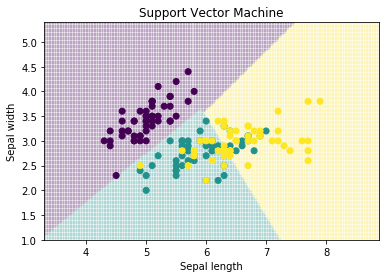

In [155]:
z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha = 0.1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Support Vector Machine')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(X[:,0], X[:,1], c = y)

#### **Differnce according to the change of setting value**

##### (1) kernel = rbf, C = 1

In [185]:
kernel = ['rbf'] * 6
C = [1, 1, 1, 1, 100, 1000]
gamma = ['auto', int(10), int(100), 'auto', 'auto', 'auto']
Parameters = np.c_[kernel, C, gamma]

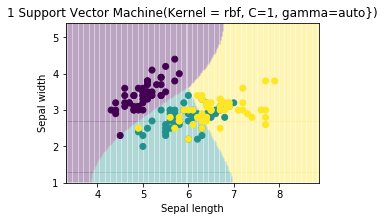

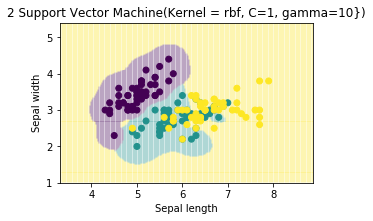

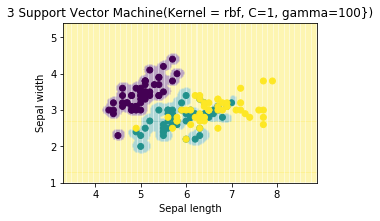

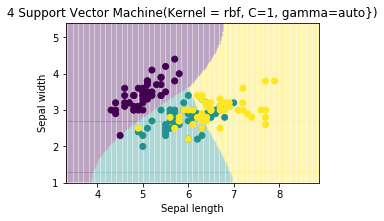

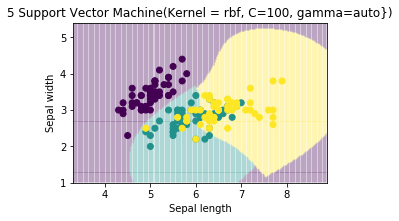

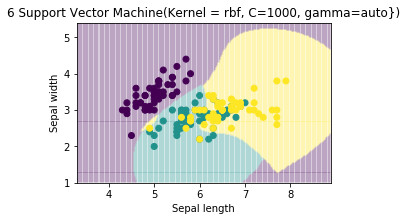

In [194]:
i = 0
for kernel, C, gamma in Parameters:
    i += 1
    if gamma == 'auto':
        gamma = str(gamma)
    else:
        gamma = int(gamma)
    estimator = svm.SVC(kernel = kernel, C=int(C), gamma = gamma)
    estimator.fit(X,y)
    z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure(figsize = (10,10))
    plt.subplot(3, 2, i)
    plt.pcolormesh(xx, yy, z, alpha = 0.1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('%d Support Vector Machine(Kernel = %s, C=%s, gamma=%s})'%(i,kernel, C, gamma))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show()